# Bayes Naive Classifier
This machine learning technique that is great at detecting patterns.

It's a family of classifiers based on Bayes' Theorem.
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
What this says is that it can calculate the probability of event $A$ given that $B$ happened, i.e. $P(A|B)$. In the contet of machne learning this means that it can find the probability for a certain label given the input data of the data point we are trying to predict.

The right side of this equation is what we can find through training the model. The numerator is effectively the probability of $A$ and $B$ both happening. You can extend this to have many more events, so you get the probability of $A$ happening given $B$, $C$, $D$, etc., i.e. $P(A|B,C,D,...)$.

Bringing this back to machine learning, it means that you can get the probability of something you want to predict based on the probabilities of features $x_1, x_2, x_3, ...$ in the dataset which you can calculate! However, this technically only holds if the features are all independent though.

This almost never holds, for example when your data is weather data like with the Ottawa biking, then temperature and rain and snow will surely be related. However, it works remarkably well even if there is a bit of dependence between the features.  That's why it's call **Naive** Bayes.

In [1]:
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

## Iris data set

In [2]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris['data']  # features
y = iris['target']  # labels

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [5]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [6]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [7]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## SMS Spam

One of the common applications of Naive Bayes is in detecting spam. It's a very fast method which is good since roughly 50% of all emails sent globally are spam! It's probably better for text messages since those cost a tiny bit of money to send.

One way of filtering spam is letting the filter look at words commonly used by spammers and words commonly used in real messages. Here is a dataset of text messages sent to phones.

Almeida,Tiago and Hidalgo,Jos. (2012). SMS Spam Collection. UCI Machine Learning Repository. https://doi.org/10.24432/C5CC84.

In [21]:
textmessages = pd.read_csv('data/SMSSpamCollection', sep='\t', header=None, names=['spam_or_ham','text'])
textmessages.head(10)

,spam_or_ham,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


We would like to look at word frequencies. Messages that have a lot of "bad" words will be more likely to be spam, messages with a lot of "good" words are probably real. So we need to count words. Fortunately, Scikit-learn comes with a feature extractor exactly for that.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
count_vect = CountVectorizer()
X = count_vect.fit_transform(textmessages.text)

In [25]:
X

<5572x8713 sparse matrix of type '<class 'numpy.int64'>'
	with 74169 stored elements in Compressed Sparse Row format>

So there are 74,169 unique words in the complete dataset. Each word has a frequency which is the input for our model. That's a lot of features! Fortunately, that is one of the strong point of Naive Bayes.

Then we just need the labels which is 'spam' or 'ham'. Then split the training set and feed the train data to the model to train on.

In [26]:
y = textmessages['spam_or_ham']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)

In [15]:
# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

We now have a trained model. Let's see what the accuracy is.

In [16]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [17]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9067264573991032


Roughtl 90% so that's pretty decent.

In [33]:
confusion_matrix(y_test, y_pred)

array([[873,  93],
       [ 11, 138]])

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

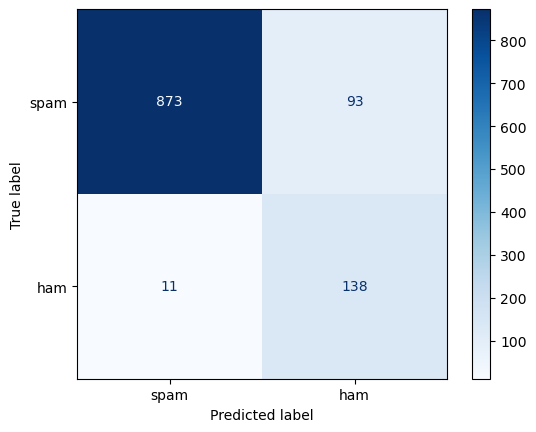

In [39]:
ConfusionMatrixDisplay.from_estimator(
        gnb,
        X_test,
        y_test,
        display_labels=["spam","ham"],
        cmap=plt.cm.Blues,
#        normalize=normalize,
    )

## Book genres

### Data
Use the CMU Book Summary Dataset at https://www.cs.cmu.edu/~dbamman/booksummaries.html

This dataset is tab separated without a header row. Column names comes from the accompying README.

In [3]:
books = pd.read_csv('data/booksummaries.txt', sep="\t", header=0, names=['wikipedia', 'freebase', 'title', 'author', 'publicationdate', 'genres', 'summary'])

In [4]:
# I don't feel like dealing with NaN
books = books.dropna()
books.head()

,wikipedia,freebase,title,author,publicationdate,genres,summary
0,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
1,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"{""/m/098tmk"": ""War novel"", ""/m/016lj8"": ""Roman...","The book tells the story of Paul Bäumer, a Ge..."
5,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,"{""/m/0dwly"": ""Children's literature"", ""/m/01hm...","Ged is a young boy on Gont, one of the larger..."
7,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"{""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""...","Living on Mars, Deckard is acting as a consul..."


Genres are in a JSON format, so we will need the JSON package to extract those.

In [5]:
import json

Convert that JSON into a simple list. We don't care about the weird identifiers.

In [6]:
def genre(row):
    g = json.loads(row.genres)
    return list(g.values())

genresperbook = books.apply(genre, axis=1)
books = books.assign(genres=genresperbook)

In [7]:
books.head()

,wikipedia,freebase,title,author,publicationdate,genres,summary
0,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan..."
1,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge..."
5,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger..."
7,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"[Science Fiction, Speculative fiction]","Living on Mars, Deckard is acting as a consul..."


## School grades

In [3]:
schools = pd.read_excel('data/new_sif_data_table_2021_22prelim_en_november2023.xlsx')

In [4]:
len(schools)

4904

In [5]:
schools.columns

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Name', 'School Type', 'School Special Condition Code',
       'School Level', 'School Language', 'Grade Range', 'Building Suite',
       'P.O. Box', 'Street', 'Municipality', 'City', 'Province', 'Postal Code',
       'Phone Number', 'Fax Number', 'School Website', 'Board Website',
       'Enrolment', 'Latitude', 'Longitude',
       'Percentage of Students Whose First Language Is Not English',
       'Percentage of Students Whose First Language Is Not French',
       'Percentage of Students Who Are New to Canada from a Non-English Speaking Country',
       'Percentage of Students Who Are New to Canada from a Non-French Speaking Country',
       'Percentage of Students Receiving Special Education Services',
       'Percentage of Students Identified as Gifted',
       'Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',
       'Change in Grade 3 Reading Achievement Over Three Years

In [6]:
subset = schools[['Percentage of Grade 9 Students Achieving the Provincial Standard in Mathematics', 'Percentage of School-Aged Children Who Live in Low-Income Households','Percentage of Students Whose Parents Have No Degree, Diploma or Certificate']]

In [7]:
subset = subset.dropna()

In [10]:
subset = subset[subset['Percentage of Grade 9 Students Achieving the Provincial Standard in Mathematics'] != 'N/R']

In [14]:
subset = subset[subset['Percentage of School-Aged Children Who Live in Low-Income Households'] != 'SP']

In [15]:
X = subset[['Percentage of School-Aged Children Who Live in Low-Income Households','Percentage of Students Whose Parents Have No Degree, Diploma or Certificate']].astype("float") # features
y = subset['Percentage of Grade 9 Students Achieving the Provincial Standard in Mathematics']  # labels

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [18]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [19]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.051094890510948905


In [20]:
len(subset)

682

In [21]:
subset

,Percentage of Grade 9 Students Achieving the Provincial Standard in Mathematics,Percentage of School-Aged Children Who Live in Low-Income Households,"Percentage of Students Whose Parents Have No Degree, Diploma or Certificate"
7,50%,20,10
14,21%,20,5
24,36%,13,8
26,25%,5,0
37,40%,15,4
...,...,...,...
4876,69%,20,2
4877,72%,11,9
4879,84%,22,6
4891,68%,12,1


In [24]:
def lettergrade(percentage):
    percentage = int(percentage.replace('%', ''))
    if percentage < 50:
        return 'F'
    if percentage <= 53:
        return 'D-'
    if percentage <= 56:
        return 'D'
    if percentage <= 61:
        return 'D+'
    if percentage <= 62:
        return 'C-'
    if percentage <= 66:
        return 'C'
    if percentage <= 69:
        return 'C+'
    if percentage <= 71:
        return 'B-'
    if percentage <= 76:
        return 'B'
    if percentage <= 79:
        return 'B+'
    if percentage <= 86:
        return 'A-'
    if percentage <= 94:
        return 'A'
    return 'A+'        

In [42]:
def boxes(percentage):
    percentage = int(percentage.replace('%', ''))
    lowerlimit = percentage // 10 * 10
    return str(lowerlimit) + '-' + str(lowerlimit+9)

In [43]:
boxes('41%')

'40-49'

In [44]:
subset['lettergrade'] = subset['Percentage of Grade 9 Students Achieving the Provincial Standard in Mathematics'].transform(boxes)

In [45]:
subset

,Percentage of Grade 9 Students Achieving the Provincial Standard in Mathematics,Percentage of School-Aged Children Who Live in Low-Income Households,"Percentage of Students Whose Parents Have No Degree, Diploma or Certificate",lettergrade
7,50%,20,10,50-59
14,21%,20,5,20-29
24,36%,13,8,30-39
26,25%,5,0,20-29
37,40%,15,4,40-49
...,...,...,...,...
4876,69%,20,2,60-69
4877,72%,11,9,70-79
4879,84%,22,6,80-89
4891,68%,12,1,60-69


In [46]:
X = subset[['Percentage of School-Aged Children Who Live in Low-Income Households','Percentage of Students Whose Parents Have No Degree, Diploma or Certificate']].astype("float") # features
y = subset['lettergrade']  # labels

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [49]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [50]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19708029197080293


Tips to improve the model

    Try transforming the variables using transformations like BoxCox or YeoJohnson to make the features near Normal.
    Try applying Laplace correction to handle records with zeros values in X variables.
    Check for correlated features and try removing the highly correlated ones. Naive Bayes is based on the assumption that the features are independent.
    Feature engineering. Combining features (a product) to form new ones that makes intuitive sense might help.
    Try providing more realistic prior probabilities to the algorithm based on knowledge from business, instead of letting the algo calculate the priors based on the training sample.

Strength

    Even though the naive assumption is rarely true, the algorithm performs surprisingly good in many cases
    Handles high dimensional data well. Easy to parallelize and handles big data well
    Performs better than more complicated models when the data set is small

Weakness

    The estimated probability is often inaccurate because of the naive assumption. Not ideal for regression use or probability estimation
    When data is abundant, other more complicated models tend to outperform Naive Bayes

In [51]:
spambase = pd.read_csv('data/spambase.csv')

In [56]:
x = spambase.drop("spam", axis = 1)
Y = spambase["spam"]

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [59]:
# Make predictions on the test set
y_pred = gnb.predict(X_test)

In [60]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19708029197080293


## Feature extraction
Unlike the penguins, we now want to predict multiple labels. One way we can do this is by creating a dummy column like we did for the islands before. Now we need a dummy column for each genre.

The following code does that. It's fairly dark magic and full transparency, I just copied it mostly from StackOverflow, but what it does is that it takes the lists in the genres column and converts them to a Pandas Series. Then it stacks them one on the other while keeping the main index but with a sub index for each genre per book. Then we get the dummies for that. The result of that is still a multi-index DataFrame but now with a column for every genre per book per listed genre for that book.

We need to collapse that back into a single-index DataFrame again, so we group all that by the first index of our multi-index DataFrame which is the index for the books. We sum on that which means that per book we now have a single row that has a 1 if that book is part of a certain genre and 0 if not. Then we add a prefix to the column name.

In [8]:
dummies = books.genres.apply(pd.Series).stack().str.get_dummies().groupby(level=0).sum().add_prefix('genre_')
books = books.join(dummies)

In [9]:
books

,wikipedia,freebase,title,author,publicationdate,genres,summary,genre_Absurdist fiction,genre_Adventure,genre_Adventure novel,...,genre_Utopian fiction,genre_Vampire fiction,genre_War novel,genre_Western,genre_Western fiction,genre_Whodunit,genre_Wuxia,genre_Young adult literature,genre_Zombie,genre_Zombies in popular culture
0,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[Science Fiction, Novella, Speculative fiction...","Alex, a teenager living in near-future Englan...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,986,/m/0ldx,The Plague,Albert Camus,1947,"[Existentialism, Fiction, Absurdist fiction, N...",The text of The Plague is divided into five p...,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[War novel, Roman à clef]","The book tells the story of Paul Bäumer, a Ge...",0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,2890,/m/011zx,A Wizard of Earthsea,Ursula K. Le Guin,1968,"[Children's literature, Fantasy, Speculative f...","Ged is a young boy on Gont, one of the larger...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4081,/m/01b4w,Blade Runner 3: Replicant Night,K. W. Jeter,1996-10-01,"[Science Fiction, Speculative fiction]","Living on Mars, Deckard is acting as a consul...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16548,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[Science Fiction],The story starts with former government agent...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16550,36534061,/m/072y44,Remote Control,Andy McNab,1997,"[Thriller, Fiction, Suspense]",The series follows the character of Nick Ston...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16554,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"[Thriller, Fiction]",The reader first meets Rapp while he is doing...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16555,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,[Autobiography],The book follows very rough chronological ord...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Phew!! Now the data is in a form we can use for the labels.

Let's look a bit closer at the genres and in particular how many books we have in each category. We'll just sum the dummy columns for genres.

In [10]:
genreusage = books.drop(['wikipedia', 'freebase', 'author', 'publicationdate', 'genres', 'title', 'summary'], axis=1).sum().sort_values(ascending=False)
genreusage

genre_Fiction                3674
genre_Speculative fiction    3270
genre_Novel                  2088
genre_Science Fiction        2001
genre_Fantasy                1863
                             ... 
genre_Prose                     1
genre_Photography               1
genre_Indian chick lit          1
genre_Superhero fiction         1
genre_Neuroscience              1
Length: 215, dtype: int64

So there are a whole bunch of genres that only have one book in the dataset. As you can imagine, this is not going to work well when training the model. So let's put in a lower limit of say 200. How many genres do we have still?

In [11]:
genreusage = genreusage.reset_index().rename(columns={0: "count"})
genreusage = genreusage[genreusage["count"] > 200]
genreusage

,index,count
0,genre_Fiction,3674
1,genre_Speculative fiction,3270
2,genre_Novel,2088
3,genre_Science Fiction,2001
4,genre_Fantasy,1863
5,genre_Children's literature,1627
6,genre_Mystery,973
7,genre_Young adult literature,625
8,genre_Crime Fiction,557
9,genre_Historical novel,551


In [12]:
genretrainlist = list(genreusage["index"])
genretrainlist

['genre_Fiction',
 'genre_Speculative fiction',
 'genre_Novel',
 'genre_Science Fiction',
 'genre_Fantasy',
 "genre_Children's literature",
 'genre_Mystery',
 'genre_Young adult literature',
 'genre_Crime Fiction',
 'genre_Historical novel',
 'genre_Suspense',
 'genre_Thriller',
 'genre_Horror',
 'genre_Romance novel',
 'genre_Historical fiction',
 'genre_Adventure novel']

In [13]:
dummies = dummies[genretrainlist]

## Input
Next is the input. These are the summaries for a book which is essentially a collection of words. We can vectorize that by making a vector that has a length ot however many unique words there are in all the summaries combined. Then each book summary can be represented as a vector that counts the number of words.

That sounds complicated to do, but fortunately, Scikit can do it for us.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [15]:
count_vect = CountVectorizer()

In [16]:
X = count_vect.fit_transform(books.summary)

In [53]:
X[0]

<1x74573 sparse matrix of type '<class 'numpy.int64'>'
	with 54 stored elements in Compressed Sparse Row format>

In [61]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X)

## Train

In [62]:
y = dummies

scaler = MaxAbsScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.3)

for k in [45]: #range(5, 56, 10):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print(f"k = {k}")
    print(accuracy_score(y_test, y_pred))
    print(hamming_loss(y_test, y_pred))
    print()

k = 45
0.07794004611837048
0.13191775557263644



In [24]:
dummies.columns

Index(['genre_Fiction', 'genre_Speculative fiction', 'genre_Novel',
       'genre_Science Fiction', 'genre_Fantasy', 'genre_Children's literature',
       'genre_Mystery', 'genre_Young adult literature', 'genre_Crime Fiction',
       'genre_Historical novel', 'genre_Suspense', 'genre_Thriller',
       'genre_Horror', 'genre_Romance novel', 'genre_Historical fiction',
       'genre_Adventure novel'],
      dtype='object')

In [26]:
for col in dummies.columns:
# Split the data into training and testing sets
    y = dummies[col]
    X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)
    
    # Train a Gaussian Naive Bayes classifier
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = gnb.predict(X_test)
    
    # Evaluate the performance of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {col}: {accuracy}")

Accuracy for genre_Fiction: 0.565357719203873
Accuracy for genre_Speculative fiction: 0.6740182894029048
Accuracy for genre_Novel: 0.7235072619688004
Accuracy for genre_Science Fiction: 0.7982786444324906
Accuracy for genre_Fantasy: 0.8542227003765466
Accuracy for genre_Children's literature: 0.8214093598708984
Accuracy for genre_Mystery: 0.8870360408821947
Accuracy for genre_Young adult literature: 0.9241527703066165
Accuracy for genre_Crime Fiction: 0.933835395373857
Accuracy for genre_Historical novel: 0.9365250134480904
Accuracy for genre_Suspense: 0.92845615922539
Accuracy for genre_Thriller: 0.9532006455083378
Accuracy for genre_Horror: 0.9553523399677246
Accuracy for genre_Romance novel: 0.9585798816568047
Accuracy for genre_Historical fiction: 0.9575040344271114
Accuracy for genre_Adventure novel: 0.9714900484131254
